In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
G= nx.Graph()
G.add_nodes_from(range(1,101))

In [2]:
import math

In [3]:
import time

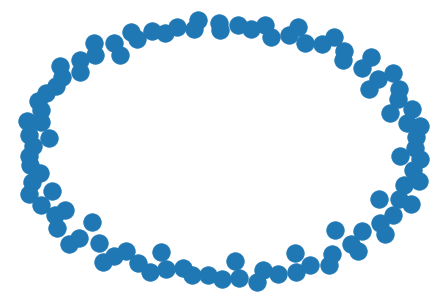

In [4]:
nx.draw(G)
plt.show()

In [5]:
def assign_bmi(G):
        for each in G.nodes():
            G.nodes[each]["name"]=random.randint(15,40)
            G.nodes[each]["type"]='person'

In [6]:
def get_labels(G):
        dict1={}
        for each in G.nodes():
             dict1[each]=G.nodes[each]['name']
        return dict1

In [7]:
def get_nodesize(G):
        array1=[]
        for each in G.nodes():
             if G.nodes[each]["type"]=='person':
                array1.append(G.nodes[each]['name']*20) 
             else:
                array1.append(1000)
        return array1 

In [8]:
def add_foci_nodes():
        n=G.number_of_nodes()
        i=n+1
        foci_nodes=['gym','eatout','movieclub','karteclub','yogaclub']
        for j in range(0,5):
            G.add_node(i)
            G.nodes[i]['name']=foci_nodes[j]
            G.nodes[i]['type']='foci'
            i=i+1


In [9]:
def get_colors(G):
        c=[]
        for each in G.nodes():
             if G.nodes[each]["type"]=='person':
                 if G.nodes[each]['name']==15:
                     c.append('yellow')
                 elif G.nodes[each]['name']==40:
                     c.append('red')
                 else:
                     c.append('blue')
             else:
                 c.append('green')
        return c

In [10]:
def get_foci_nodes():
        f=[]
        for each in G.nodes():
             if G.nodes[each]["type"]=='foci':
                 f.append(each)
        return f
def get_person_nodes():
        f=[]
        for each in G.nodes():
             if G.nodes[each]["type"]=='person':
                 f.append(each)
        return f

In [11]:
def add_foci_edges():
        foci_nodes=get_foci_nodes()
        person_nodes=get_person_nodes()
        for each in person_nodes:
            r=random.choice(foci_nodes)
            G.add_edge(each,r)

In [12]:
def homophily(G):
        pnodes=get_person_nodes()
        for u in pnodes:
            for v in pnodes:
                if u!=v:
                    diff=abs(G.nodes[u]['name']-G.nodes[v]['name'])
                    p=float(1)/(diff+1000)
                    r=random.uniform(0,1)
                    if r<p:
                        G.add_edge(u,v)

        

In [13]:
def cmmn(u,v,G):
        nu=set(G.neighbors(u))
        nv=set(G.neighbors(v))
        return len(nu & nv)

In [14]:
def closure(G):
        array1=[]
        for u in G.nodes():
            for v in G.nodes():
                if u!=v and (G.nodes[u]['type']=='person' or G.nodes[v]['type']=='person'):
                    k=cmmn(u,v,G)
                    p=1- math.pow((1-0.01),k)
                    tmp=[]
                    tmp.append(u)
                    tmp.append(v)
                    tmp.append(p)
                    array1.append(tmp)
        for each in array1:
            u=each[0]
            v=each[1]
            p=each[2]
            r=random.uniform(0,1)
            if r<p:
                G.add_edge(u,v)
        

In [15]:
def change_bmi(G):
        fnodes=get_foci_nodes()
        for each in fnodes:
            if G.nodes[each]['name']=='eatout':
                for each1 in G.neighbors(each):
                     if G.nodes[each1]['name']!=40:
                          G.nodes[each1]['name']=G.nodes[each1]['name']+1
            if G.nodes[each]['name']=='gym':
                for each1 in G.neighbors(each):
                     if G.nodes[each1]['name']!=15:
                          G.nodes[each1]['name']=G.nodes[each1]['name']-1   
                                    

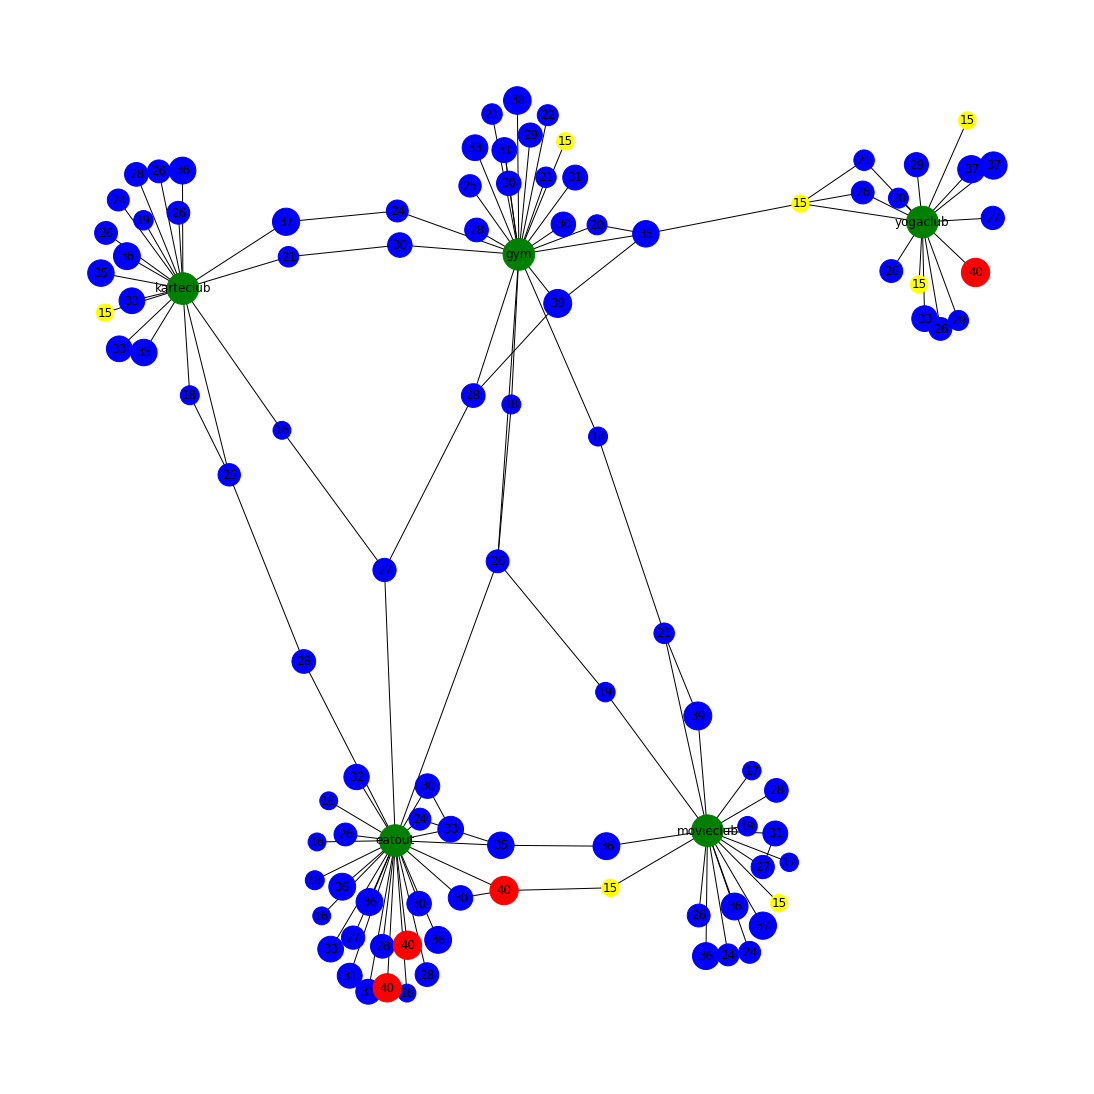

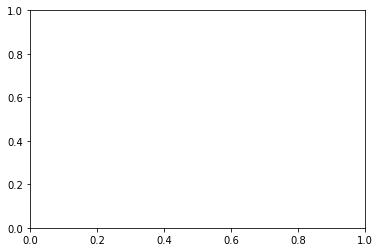

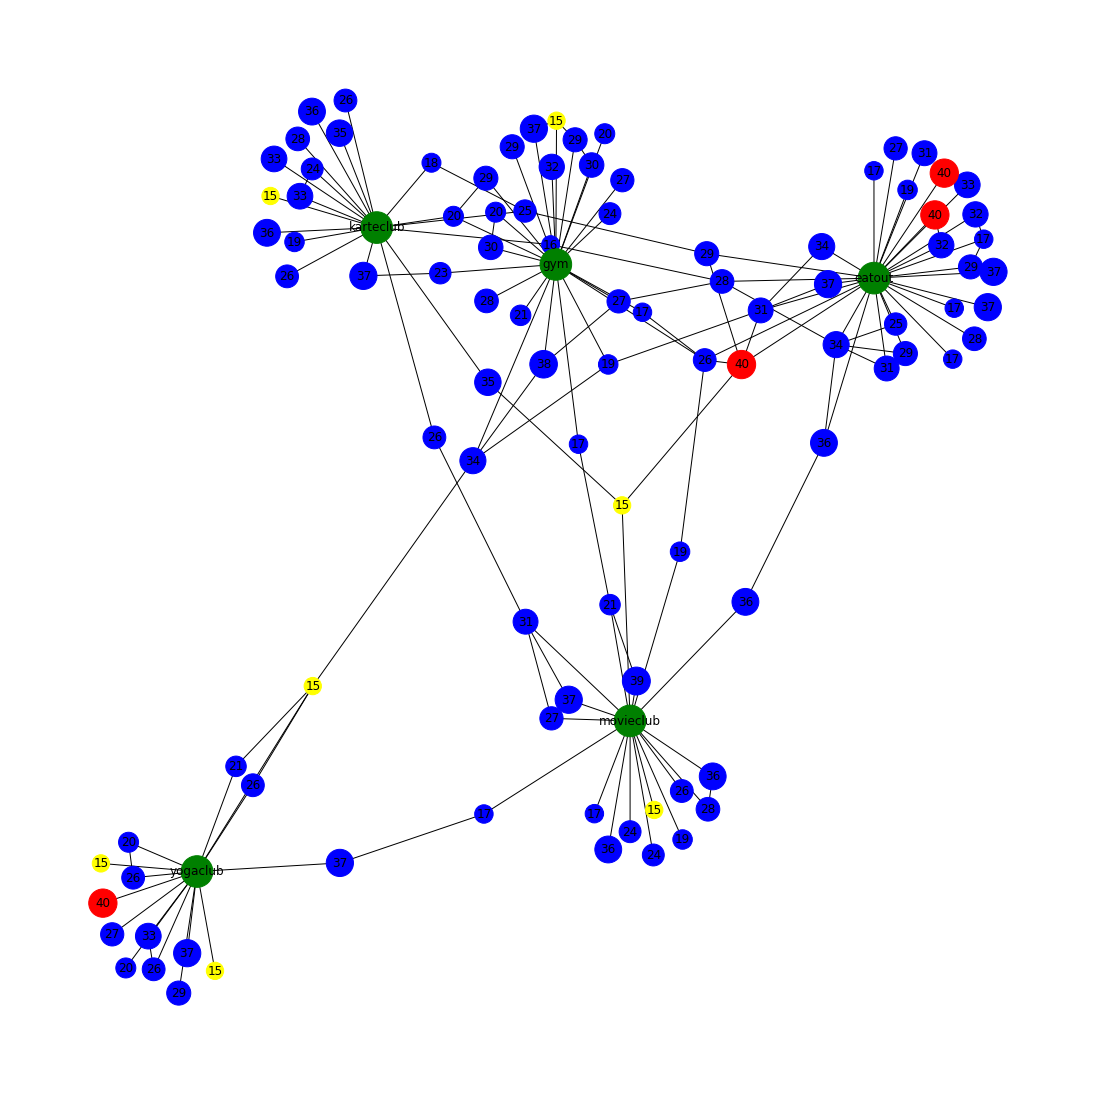

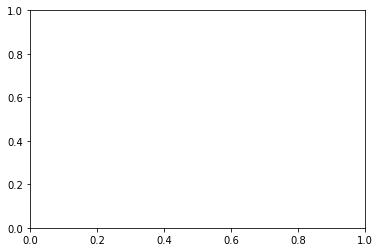

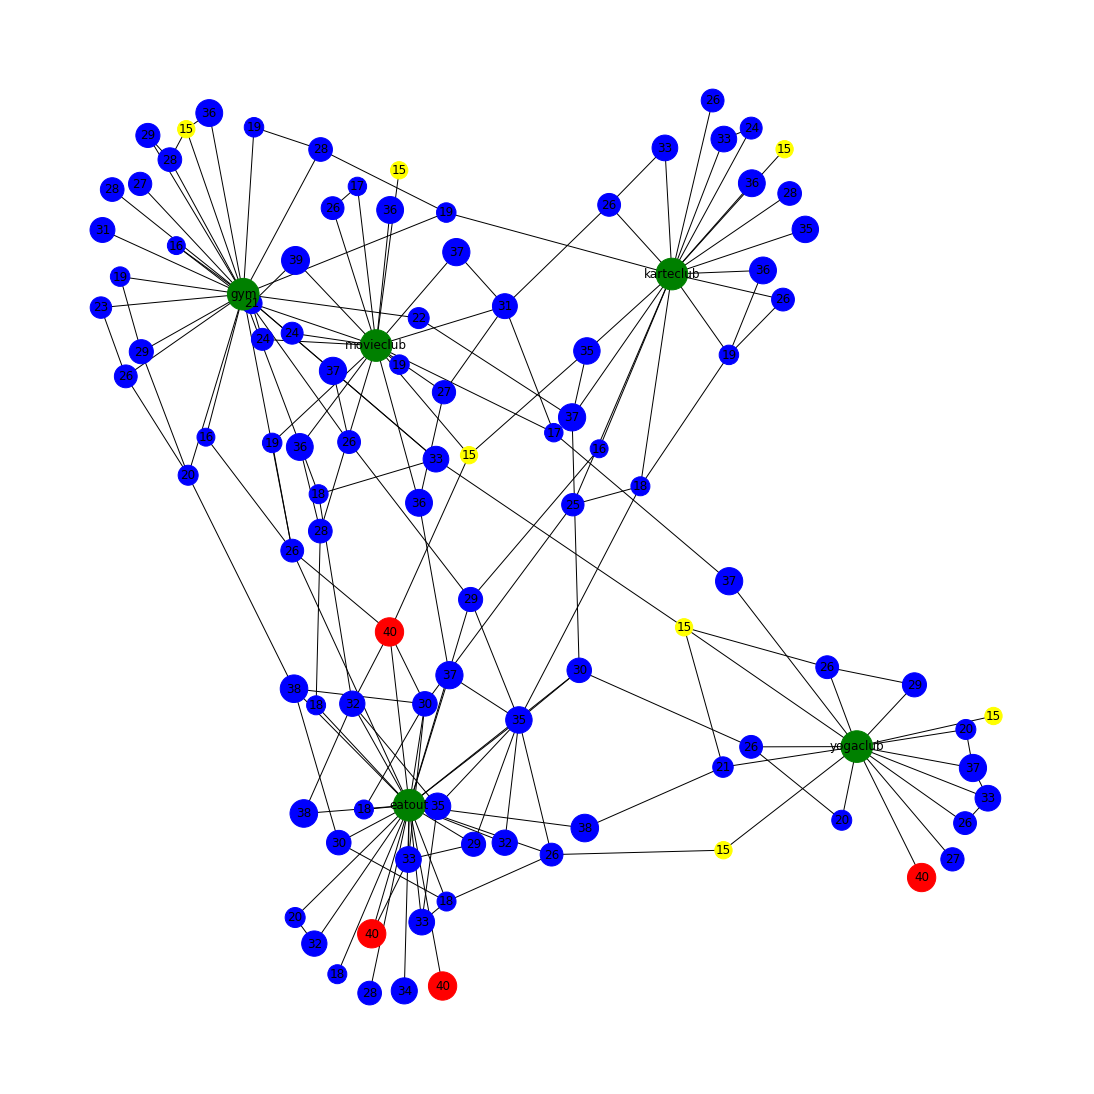

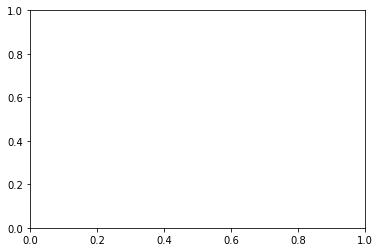

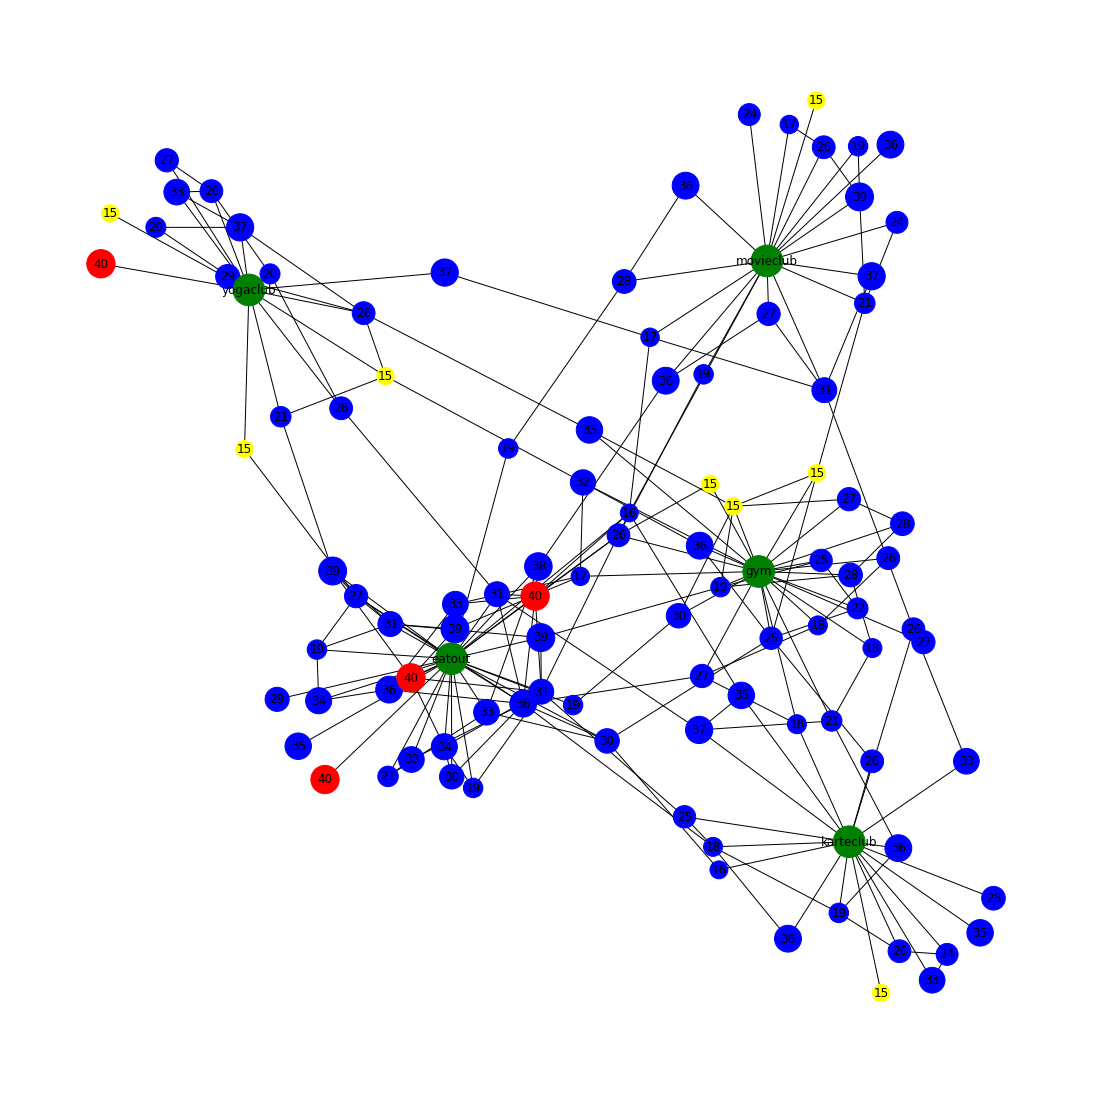

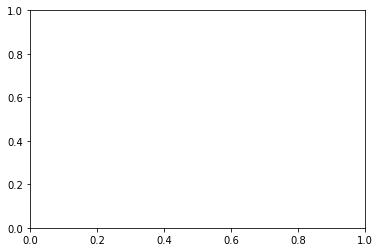

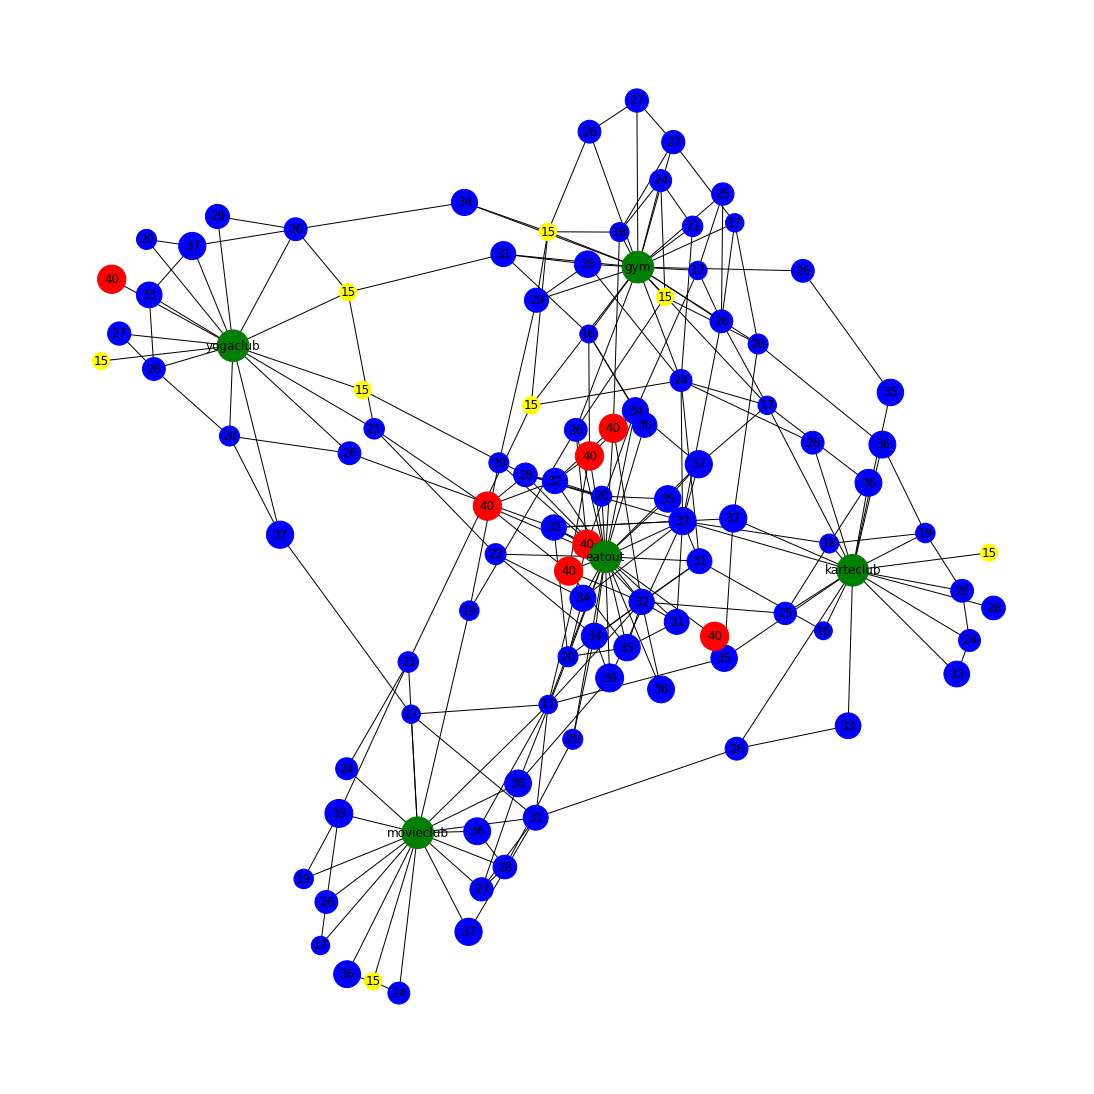

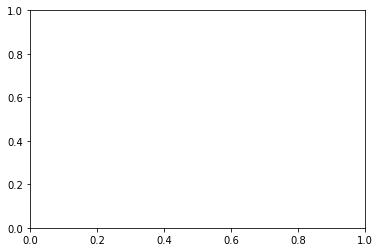

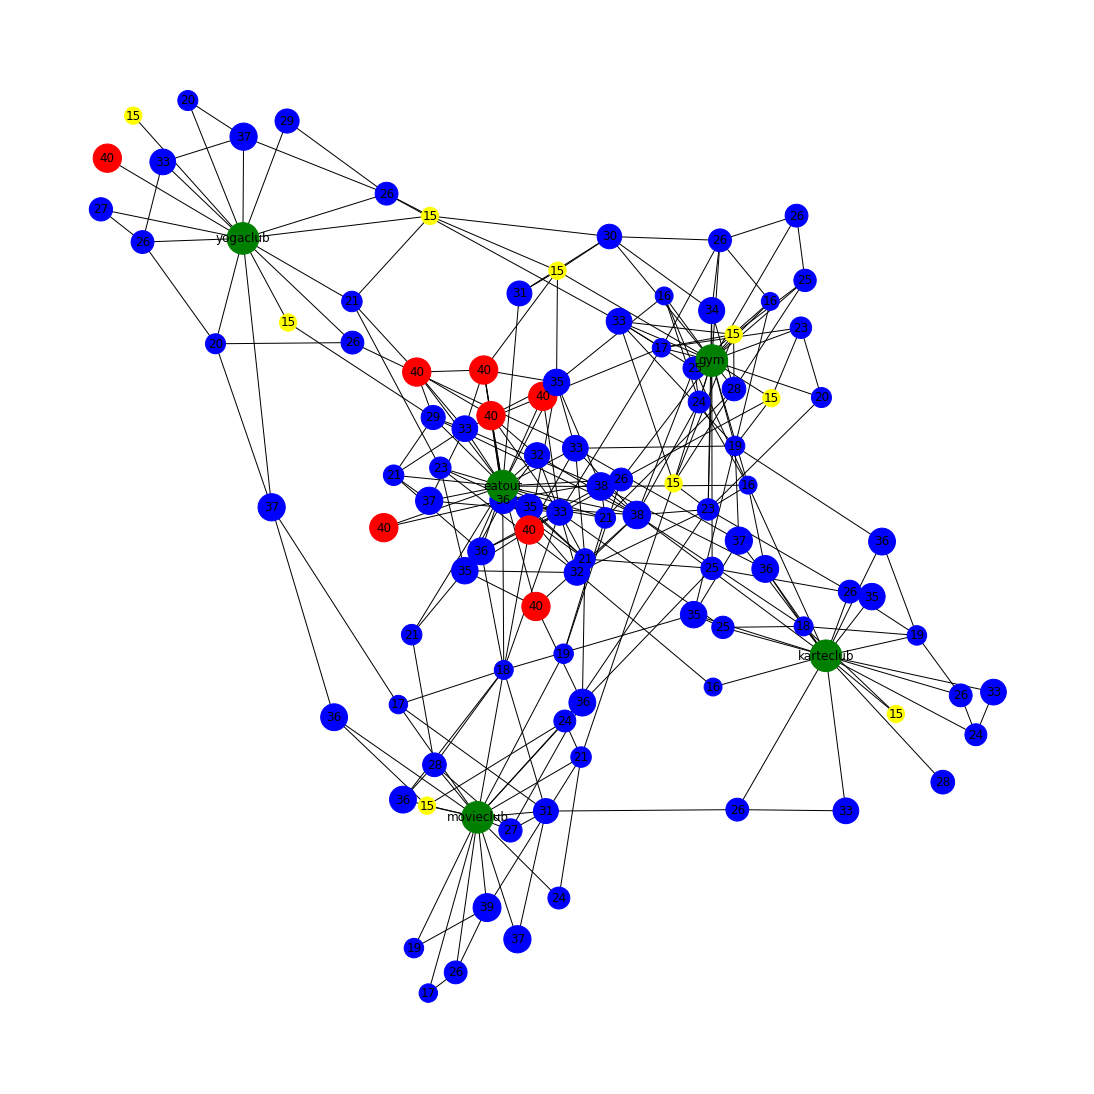

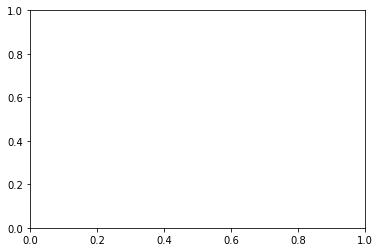

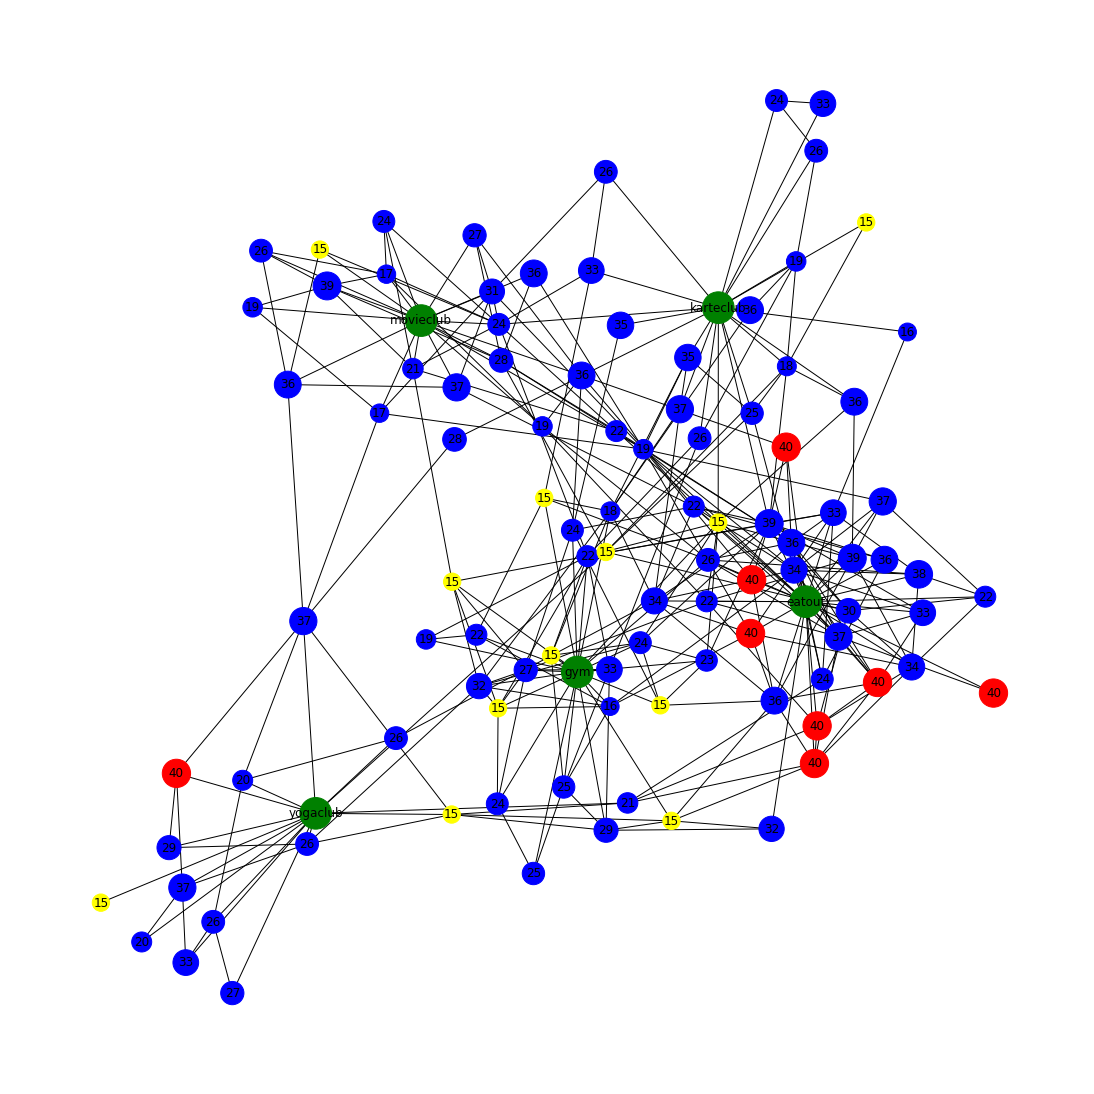

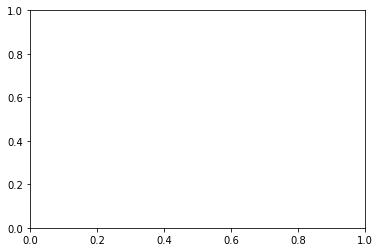

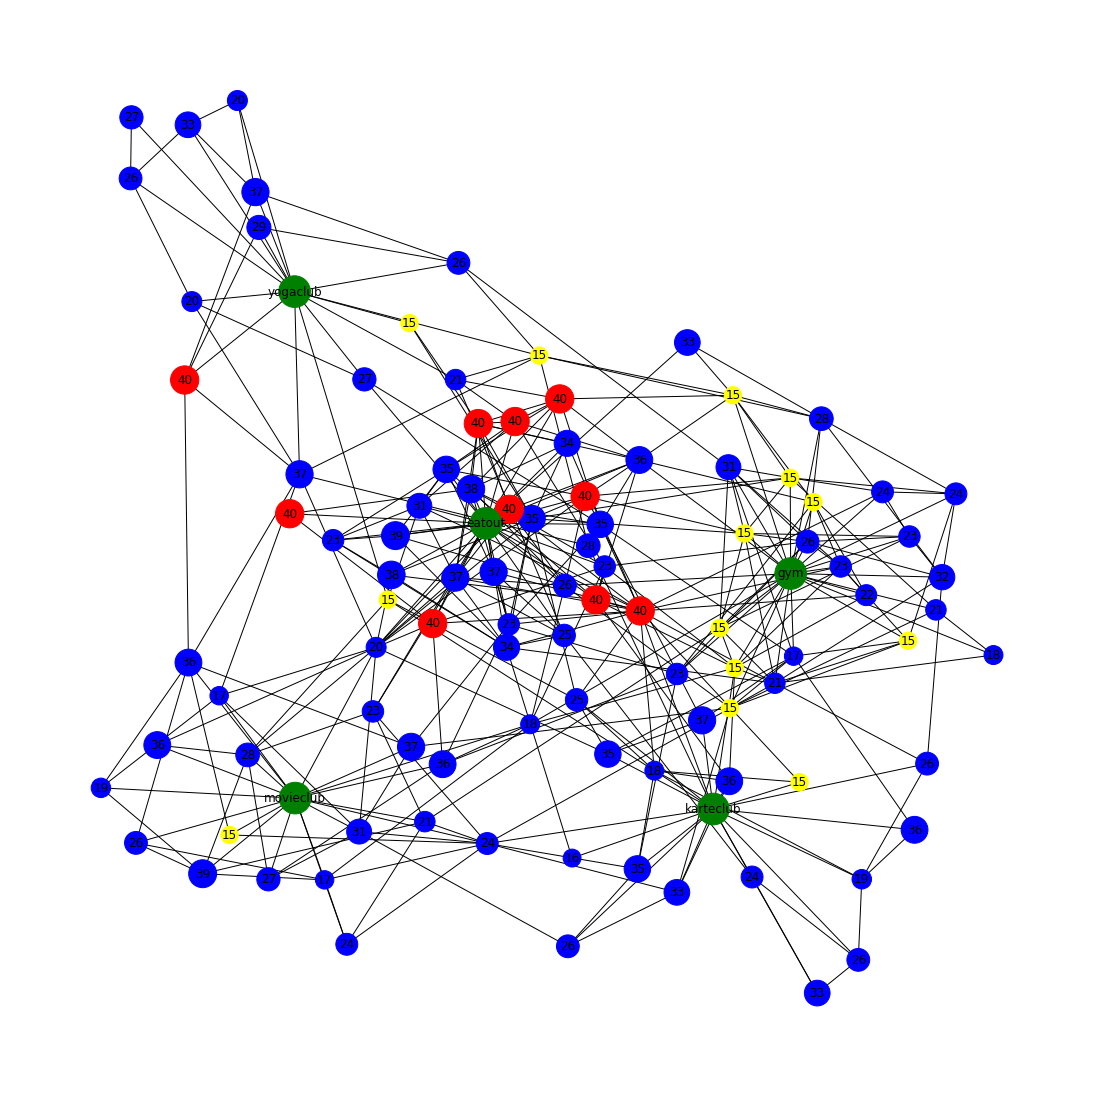

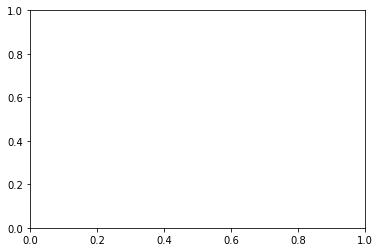

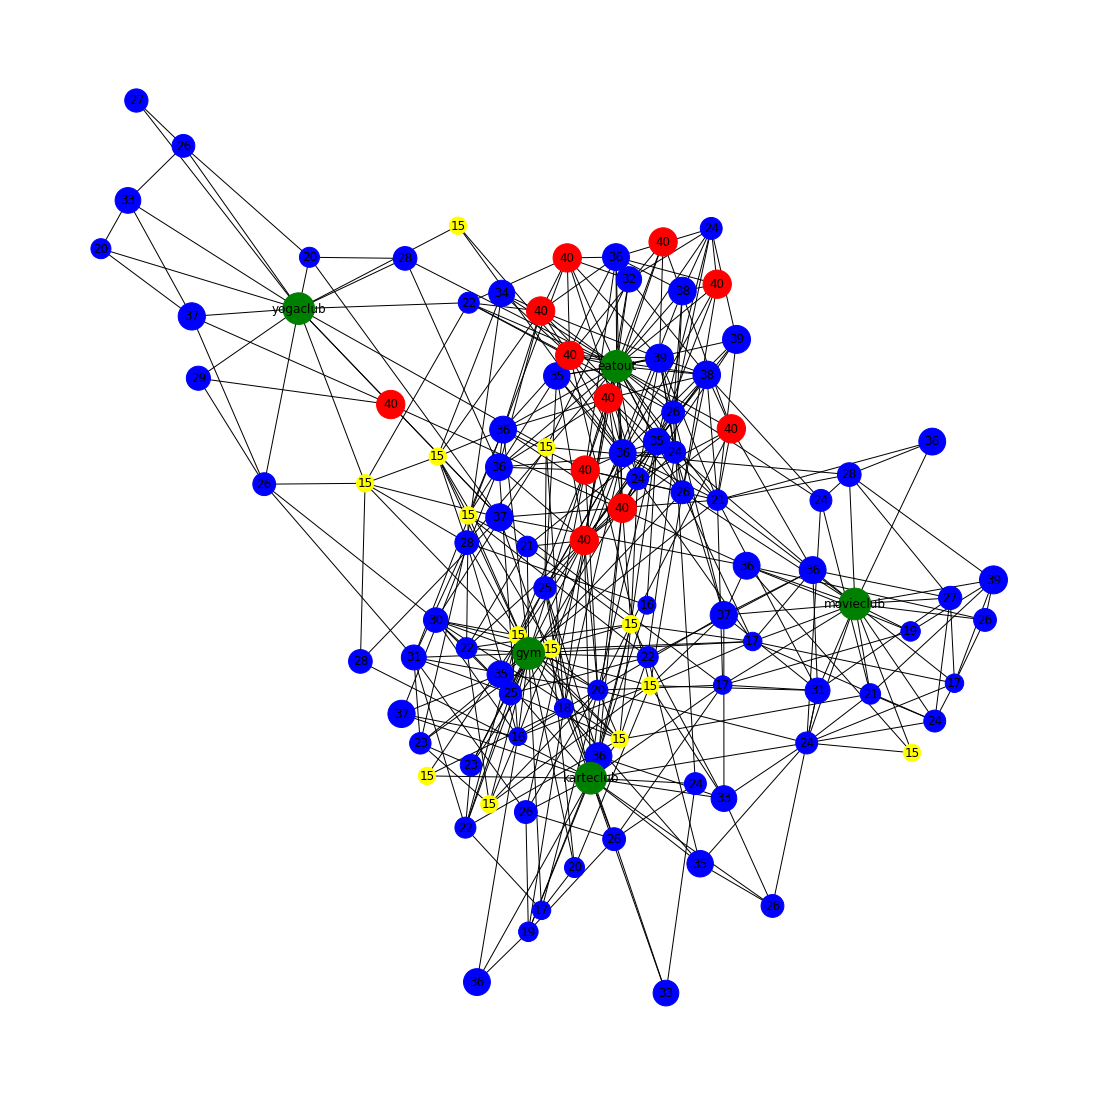

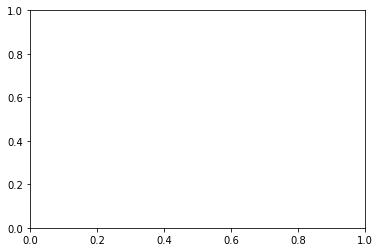

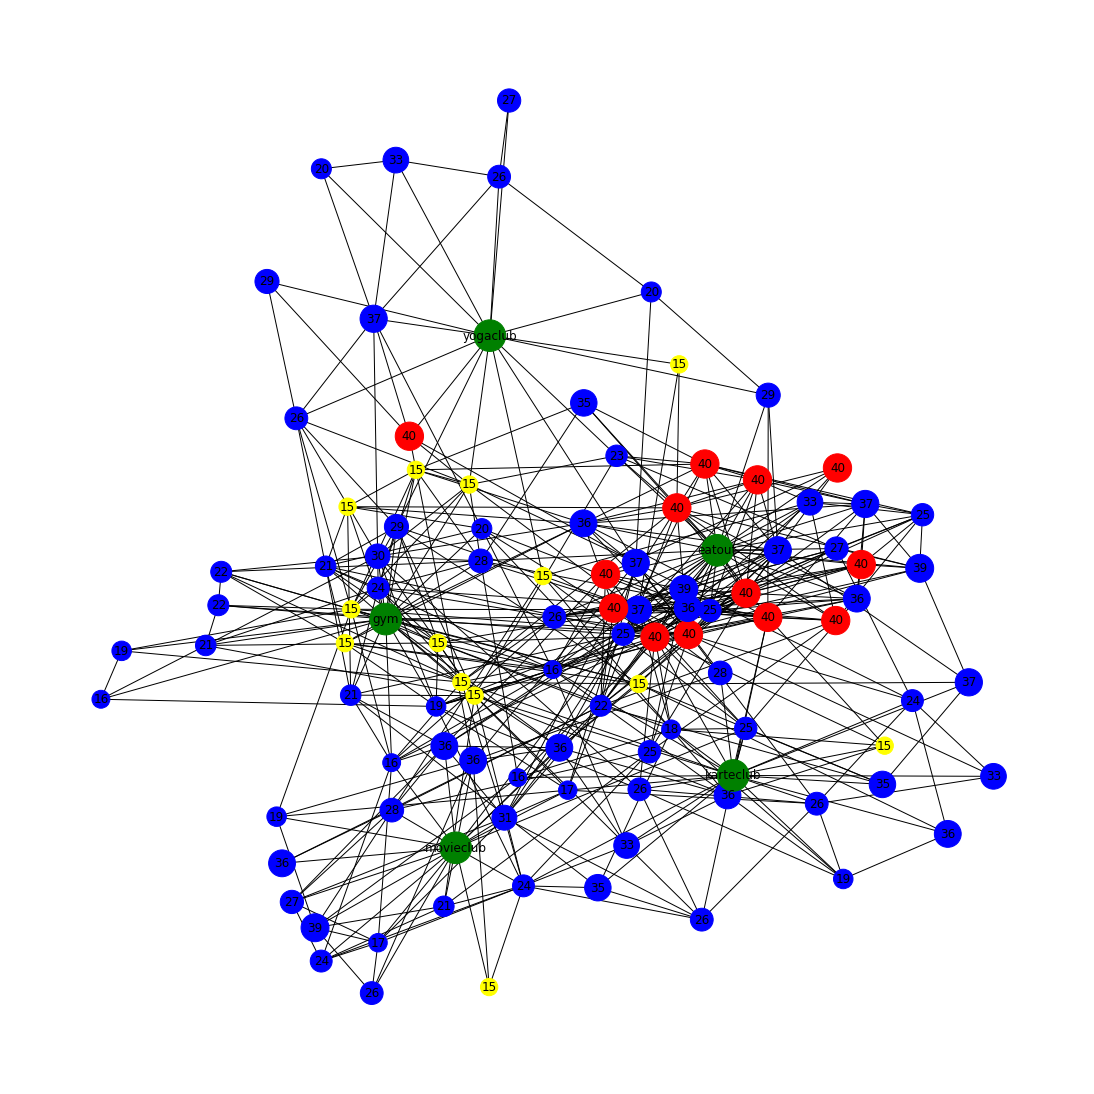

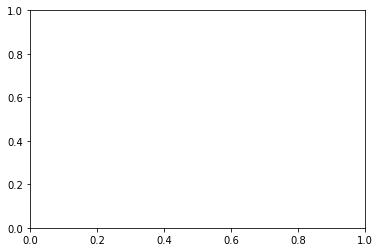

In [16]:
assign_bmi(G)
add_foci_nodes()
add_foci_edges()
from google.colab import files
for t in range(0,10):
    homophily(G)
    closure(G)
    change_bmi(G)
    labeldict=get_labels(G)
    nodessize=get_nodesize(G)
    color_array=get_colors(G)
    plt.figure(figsize=(15,15))
    nx.draw(G,labels=labeldict,node_size=nodessize,node_color=color_array)
    plt.show()
    plt.savefig('evolution.jpg')
    plt.clf()
    plt.cla()
    nx.write_gml(G,'evolution_file_'+str(t+1)+'.gml')
    #plt.to_gml('evolution_file.gml')
    files.download('evolution_file_'+str(t+1)+'.gml')